In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [31]:
file=pd.read_csv(r"C:\Users\HP\Downloads\sms-spam-collection-dataset (1)\spam.csv", encoding='latin1')

In [32]:
file.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
file.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [34]:
spam=file[file["v1"]=="spam"]
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [35]:
spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,747,747,5,2,0.0
unique,1,653,4,1,0.0
top,spam,Please call our customer service representativ...,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
freq,747,4,2,2,NaN


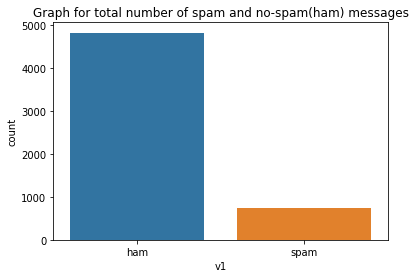

In [36]:
sns.countplot(data = file, x= file["v1"]).set_title("Graph for total number of spam and no-spam(ham) messages")
plt.show()

In [37]:
training_data, testing_data, training_labels, testing_labels = train_test_split(file.v2,file.v1,test_size=0.2,random_state=0) 
print("training_data, training_labels : ",training_data.shape, training_labels.shape)
print("testing_data, testing_labels : ",testing_data.shape, testing_labels.shape)

training_data, training_labels :  (4457,) (4457,)
testing_data, testing_labels :  (1115,) (1115,)


In [38]:
vectorizer = CountVectorizer()
trainingdata_count = vectorizer.fit_transform(training_data)
testingdata_count  = vectorizer.transform(testing_data)

In [39]:
testingfield = MultinomialNB()
testingfield.fit(trainingdata_count, training_labels)
my_predictions = clf.predict(testingdata_count)
my_predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [40]:
print ("confusion_matrix is as follows: \n", confusion_matrix(testing_labels, my_predictions))

confusion_matrix is as follows: 
 [[947   2]
 [ 12 154]]


In [41]:
print (classification_report(testing_labels, my_predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [42]:
print ("accuracy_score : ", accuracy_score(testing_labels, my_predictions))

accuracy_score :  0.9874439461883409
